In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math
import time
import os
import sys

path = os.path.dirname(os.path.abspath(""))
print(path)
sys.path.append(path)

c:\Users\linh2\source\repos\Multiple_Fuzzification_Coefficients_FCM


In [5]:
import Components.Cores.clusters_generations as cg
from Components.Algorithms.sSMC_FCM import sSMC_FCM

Initializing variables
Initialized cluster centers in  0.0  s
Update U non_supervision in  0.0010001659393310547  s
Initialized m2:  2  in  0.0  s
Start solving the algorithm
Iteration 0/5 completed in 0.0 s
U, V calculation time consume: 0.0 s, 0.0 s
Iteration 1/5 completed in 0.001505136489868164 s
U, V calculation time consume: 0.0 s, 0.001505136489868164 s
Iteration 2/5 completed in 0.0006589889526367188 s
U, V calculation time consume: 0.0006589889526367188 s, 0.0 s
Iteration 3/5 completed in 0.0 s
U, V calculation time consume: 0.0 s, 0.0 s
Iteration 4/5 completed in 0.0010056495666503906 s
U, V calculation time consume: 0.0010056495666503906 s, 0.0 s
Time consuming: 0.0031697750091552734 s


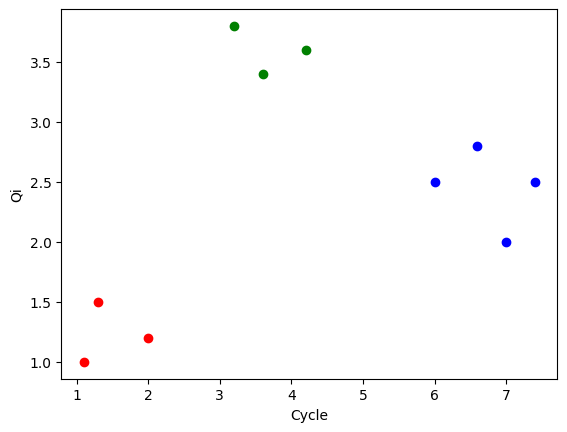

In [10]:
C = 3

X = np.array([1.1, 1.3, 2, 3.2, 3.6, 4.2, 6.0, 6.6, 7.0, 7.4])
Y = np.array([1, 1.5, 1.2, 3.8, 3.4, 3.6, 2.5, 2.8, 2.0, 2.5])
N = len(X)

# ### Run the sSMC FCM algorithm
alg = sSMC_FCM()

# initialize variables; initialize U, V, m2
print("Initializing variables")
max_iter = 5
alpha = 0.5
alg.X = X
alg.X = alg.X.reshape(-1, 1)
alg.Y = np.array([0, 0, np.nan, 1, 1, np.nan, np.nan, 2, 2, np.nan])
alg.U = np.zeros((N, C))
alg.m = 2
alg.epsilon = 0.0001
total_count_time = time.time()
alg.V = cg.sSMC_FCM_kmean_plus_plus(alg.X, alg.Y, C, alg.distance_fn, alg.lnorm)
total_count_time = time.time() - total_count_time
print("Initialized cluster centers in ", total_count_time, " s")

total_count_time = time.time()
alg.U = alg.update_U_non_supervision()
total_count_time = time.time() - total_count_time
print("Update U non_supervision in ", total_count_time, " s")

total_count_time = time.time()
alg.m2 = alg.calculate_m2(alpha)
total_count_time = time.time() - total_count_time
print("Initialized m2: ", alg.m2, " in ", total_count_time, " s")

total_count_time = time.time()
print("Start solving the algorithm")
for l in range(max_iter):
    count_time = time.time()
    alg.U = alg.update_U()
    U_count_time = time.time() - count_time

    alg.V_old = alg.V

    count_time = time.time()
    alg.V = alg.update_V()
    V_count_time = time.time() - count_time

    print(f"Iteration {l}/{max_iter} completed in {U_count_time + V_count_time} s")
    print(f"U, V calculation time consume: {U_count_time} s, {V_count_time} s")

    if alg.is_converged():
        break
total_count_time = time.time() - total_count_time
print(f"Time consuming: {total_count_time} s")

pred_y = np.argmax(alg.U, axis=1)
color_clusters = ['r', 'g', 'b']

plt.xlabel('Cycle')
plt.ylabel('Qi')

for i in range(N):
    plt.scatter(X[i], Y[i], color=color_clusters[pred_y[i]])

plt.show()